In [10]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd 
import tensorflow as tf

In [3]:
df=pd.read_csv('andSVM_2.csv')
df

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1
4,2,3,1
5,3,2,1
6,0,-1,0


In [4]:
X=np.asarray(df.iloc[:,0:2]) 
y=np.asarray(df.iloc[:,2])

In [5]:
def agunos(x):
    unos=np.array([np.ones(len(x))]) 
    x=np.array(np.concatenate((unos.T,x),axis=1)) 
    return x

In [6]:
def clasif(y): 
    pred=np.array([])
    for i in range(len(y)):
        if y[i]>=0:
            pr=1
        else:
            pr=0
        pred=np.append(pred,pr)  
    return pred

In [7]:
def train(X,y,eta):
    w=np.ones(X.shape[1])#np.random.uniform(0,1,size=X.shape[1])
    output=clasif(np.dot(X,w.T)) 
    err=y-output
    dif=sum(err)
    while(abs(dif)!=0):
        for i in range(X.shape[1]):
            w[i]=w[i]+eta*np.dot(y-clasif(np.dot(X,w.T)),X[:,i]) 
        output=clasif(np.dot(X,w.T)) 
        err=y-output 
        dif=sum(err)
    return w 

In [8]:
W=train(agunos(X),y,0.1) #entrena(X,y,0.1)
W

array([-0.6,  0.5,  0.5])

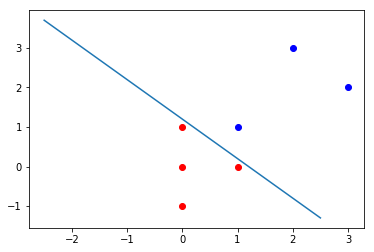

In [9]:
plt.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],color='blue') 
plt.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],color='red')
x=np.linspace(-2.5,2.5,10)
plt.plot(x,-(W[0]/W[2])-(W[1]/W[2])*x)

In [72]:
svm=SVC(C=100,kernel='linear')

In [73]:
svm.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
pred=svm.predict(X)
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         7

[[4 0]
 [0 3]]


In [75]:
b=svm.intercept_
w1=svm.coef_[0][0]
w2=svm.coef_[0][1]

In [76]:
svm.support_vectors_

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  1.]])

In [77]:
b1 = svm.support_vectors_[0]
b2 = svm.support_vectors_[-1]

In [78]:
svm.support_vectors_[1]

array([ 1.,  0.])

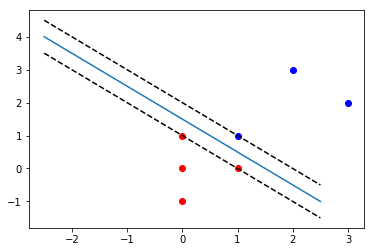

In [79]:
plt.scatter(df[df['y']==1]['X1'],df[df['y']==1]['X2'],color='blue') 
plt.scatter(df[df['y']==0]['X1'],df[df['y']==0]['X2'],color='red')
x=np.linspace(-2.5,2.5,10)
plt.plot(x,-(b/w2)-(w1/w2)*x)
plt.plot(x,-(w1/w2)*x+(b1[1]-(-(w1/w2))*b1[0]),'k--')
plt.plot(x,-(w1/w2)*x+(b2[1]-(-(w1/w2))*b2[0]),'k--')

**CIRCULO**

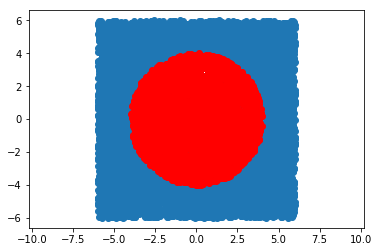

In [80]:
x1 = np.array([np.random.uniform(-6,6) for i in range(10000)])
x2 = np.array([np.random.uniform(-6,6) for i in range(10000)])

dat=pd.DataFrame(x1,columns=['x1'])
dat['x2']=x2 
dat['x1cuad']=dat['x1']**2
dat['x2cuad']=dat['x1']**2
dat['y']=(dat['x1']**2+dat['x2']**2).apply(lambda x: 1 if x<=16 else 0)
dat

plt.scatter(dat['x1'],dat['x2'])
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red')
plt.axis("equal")
#plt.plot(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='green')

Xq=np.asarray(dat[['x1','x2','x1cuad','x2cuad']]) 
#X=np.concatenate((np.ones((X.shape[0],1)), X), 1)
yq=np.asarray(dat[['y']])

**Red Neuronal**

In [84]:
hidden=3
features=Xq.shape[1]
n_output=1
x = tf.placeholder(tf.float32, shape=[len(Xq),features ])
y_ = tf.placeholder(tf.float32, shape=[len(yq),n_output]) #la y real


W1=tf.Variable(tf.random_uniform([features,hidden],-1,1),name='W1') 
W2=tf.Variable(tf.random_uniform([hidden,n_output],-1,1),name='W2')
b1=tf.Variable(tf.zeros([hidden]),name='b1') 
b2=tf.Variable(tf.zeros([n_output]),name='b2')

H=tf.sigmoid(tf.matmul(x,W1)+b1) 
Z=tf.sigmoid(tf.matmul(H,W2)+b2) 

lossfn=tf.reduce_mean(((y_*tf.log(Z))+((1-y_)*tf.log(1.0-Z)))*-1)  

train_step=tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
init=tf.initialize_all_variables() 
sess=tf.Session()y_true


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [85]:
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: Xq, y_: yq})

In [88]:
correct_prediction = tf.equal(tf.round(Z),y) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: Xq, y: yq})) # las corremos

0.9814


In [89]:
zz1=tf.sigmoid(tf.add(tf.matmul(x,W1),b1)) 
zz2=tf.sigmoid(tf.add(tf.matmul(zz1,W2),b2))
zx=sess.run(zz2,feed_dict={x:Xq})
dd=np.round(zx)
#np.sum(dd)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(yq,dd))
print(confusion_matrix(yq,dd))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      6520
          1       0.98      0.97      0.97      3480

avg / total       0.98      0.98      0.98     10000

[[6445   75]
 [ 111 3369]]


In [107]:
print('Accuracy')
((confusion_matrix(yq,dd)[0][0])+(confusion_matrix(yq,dd)[1][1]))/sum(sum(confusion_matrix(yq,dd)))

Accuracy


0.98140000000000005

(-6.6073455782549999,
 6.6096910932539643,
 -6.6149911319147439,
 6.6148642304677336)

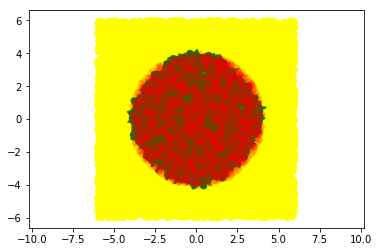

In [113]:
plt.scatter(dat['x1'],dat['x2'],color=['green' if i==1 else 'yellow' for i in dd]) 
plt.scatter(dat[dat['y']==1]['x1'],dat[dat['y']==1]['x2'],color='red',alpha=0.1)
plt.axis("equal")

**SVM Kernel Lineal**

In [92]:
X_train,X_test,y_train,y_test=train_test_split(Xq,yq,test_size=0.3,random_state=101) 


dftrain=pd.DataFrame(X_train,columns=['x1','x2','x1cuad','x2cuad'])
dftrain['y']=y_train

dftest=pd.DataFrame(X_test,columns=['x1','x2','x1cuad','x2cuad'])
dftest['y']=y_test

In [93]:
svml=SVC(C=1,kernel='linear',probability=True)
svml.fit(X_train,y_train)
pred=svml.predict(X_train) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_train,pred))
print(confusion_matrix(y_train,pred))

/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.86      0.75      0.80      4591
          1       0.61      0.77      0.68      2409

avg / total       0.78      0.75      0.76      7000

[[3423 1168]
 [ 554 1855]]


In [112]:
print('Accuracy')
(confusion_matrix(y_train,pred)[0][0]+confusion_matrix(y_train,pred)[1][1])/sum(sum(confusion_matrix(y_train,pred)))

Accuracy


0.754

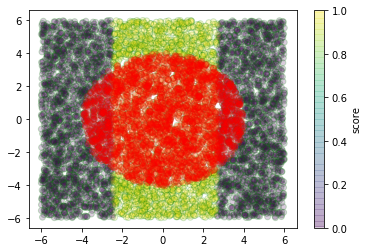

In [115]:
#plt.scatter(dat['x1'],dat['x2'])
#plt.scatter(dat['x1'],pred,color=['yellow' if i==1 else "blue" for i in pred]) 
plt.scatter(X_train[:,0], X_train[:,1], c = pred, cmap='viridis',
            edgecolor = 'green',
            alpha = .2)
plt.colorbar(label = 'score') 

plt.scatter(dftrain[dftrain['y']==1]['x1'],dftrain[dftrain['y']==1]['x2'],color='red',alpha=0.2)

**SVM Kernel rbf**

In [102]:
svmr=SVC(C=.1,kernel='rbf',probability=True)
svmr.fit(X_train,y_train)
predr=svmr.predict(X_train) 
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_train,predr))
print(confusion_matrix(y_train,predr))

/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4591
          1       0.99      0.97      0.98      2409

avg / total       0.99      0.99      0.99      7000

[[4578   13]
 [  68 2341]]


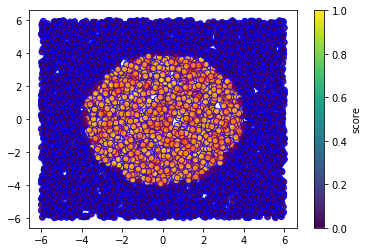

In [103]:
plt.scatter(X_train[:,0], X_train[:,1], c = predr,cmap='viridis', 
            edgecolor = 'blue',
            alpha = 0.9)
plt.colorbar(label = 'score') 

plt.scatter(dftrain[dftrain['y']==1]['x1'],dftrain[dftrain['y']==1]['x2'],color='red',alpha=0.05)

**El mejor resultado es con svm pero kernel=rbf**

In [111]:
print('Accuracy')
(confusion_matrix(y_train,predr)[0][0]+confusion_matrix(y_train,predr)[1][1])/sum(sum(confusion_matrix(y_train,predr)))

Accuracy


0.98842857142857143